## Capstone Project 2

_______________________________

### Predicting which previously purchased products will be in a Instacart user’s next order<br/>
### Building a recommender system based on user's past orders

____________________________


*“The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on 27 August 2019*

______________________________________

--------------------------------------

The following preliminary exploratory analysis is carried out

 - [x] Which day has the most orders? 
 - [x] What time of the day are most orders placed? 
 - [x] Lull period (between reorders) - frequency of reorder  
 - [x] Which department do most reorders belong to? 
 - [x] Which aisle do most reorders belong to ? 
 - [x] Average number of items in a reorder 
 - Which customers have most reorders
 - [x] Number of organic products in reorders
 - [x] Most reordered products
 - Frequency(of ordering) of top reordered products
 - Frequency (of ordering) of top reordered departments/aisles
 - Reorder ratio by Department
 - Reorder ratio by Aisle
 



## File descriptions (taken from Kaggle competition page)

Each entity (customer, product, order, aisle, etc.) has an associated unique id. Most of the files and variable names should be self-explanatory.

### aisles.csv

```
 aisle_id,aisle  
 1,prepared soups salads  
 2,specialty cheeses  
 3,energy granola bars  
 ...

```

### departments.csv

```
 department_id,department  
 1,frozen  
 2,other  
 3,bakery  
 ...

```

### order_products__*.csv

These files specify which products were purchased in each order. order_products__prior.csv contains previous order contents for all customers. 'reordered' indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items. You may predict an explicit 'None' value for orders with no reordered items.

```
 order_id,product_id,add_to_cart_order,reordered  
 1,49302,1,1  
 1,11109,2,1  
 1,10246,3,0  
 ... 

```

### orders.csv

This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders. 'order_dow' is the day of week.

```
 order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order  
 2539329,1,prior,1,2,08,  
 2398795,1,prior,2,3,07,15.0  
 473747,1,prior,3,3,12,21.0  
 ...

```

### products.csv

```
 product_id,product_name,aisle_id,department_id
 1,Chocolate Sandwich Cookies,61,19  
 2,All-Seasons Salt,104,13  
 3,Robust Golden Unsweetened Oolong Tea,94,7  
 ...
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

In [2]:
df_orders = pd.read_csv ('orders.csv')
df_aisles = pd.read_csv ('aisles.csv')
df_dept = pd.read_csv ('departments.csv')
df_products = pd.read_csv ('products.csv')
df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_order_products_train = pd.read_csv ('order_products__train.csv')

### Inspecting the data types and missing in all the tables

In [3]:
df_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
df_orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

- **user_id is initialized as an integer, needs to be converted to datatype 'category'<br/>**
- **eval_set is initialized as object, needs to be converted to datatype 'category'<br/>**
- **days_since_prior_order is initialized as a float, could be classified as int but no changes will be made now**



In [5]:
df_orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

**days_since_prior_order has 206209 NaN values**

In [6]:
print("Orders shape:{}".format(df_orders.shape))

Orders shape:(3421083, 7)


In [7]:
df_orders['order_id'].nunique()

3421083

**Comparing the above, there is no duplicate data in the table**

In [8]:
df_aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
df_aisles.dtypes

aisle_id     int64
aisle       object
dtype: object

**aisle column can be converted to 'category' type**

In [10]:
df_aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [11]:
print("Aisles shape:{}".format(df_aisles.shape))

Aisles shape:(134, 2)


In [12]:
df_aisles.nunique()

aisle_id    134
aisle       134
dtype: int64

No duplicated aisles data in the table

In [13]:
df_dept.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [14]:
df_dept.nunique()

department_id    21
department       21
dtype: int64

In [15]:
print("Departments shape:{}".format(df_dept.shape))

Departments shape:(21, 2)


There are 21 unique departments listed in the table

In [16]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

**department column can be converted to 'category' type**

In [17]:
df_dept.isna().sum()

department_id    0
department       0
dtype: int64

In [18]:
df_products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
df_products.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

- **product_name initialized with 'object' datatype, can be converted to 'category'**
- **aisle_id and department_id initialized as 'int64', needs to be converted to 'category'**

In [20]:
df_products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [21]:
df_order_products_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [22]:
df_order_products_prior.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

- **order_id, product_id, reordered columns to be changed to 'category' type**

In [23]:
df_order_products_train.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [24]:
df_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [25]:
df_orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [26]:
print("Orders shape:{}".format(df_orders.shape))

Orders shape:(3421083, 7)


No null values in df_orders dataframe except for 'days_since_prior_order' column


--------------------------
--------------------------

Summary of changes required in the tables :

1. Following columns data type to be changed to **'category'**:
    - department
    - aisle
    - product_name
    - department_id 
    - aisle_id 
    - product_id
    - order_id
    - reordered



2. **days_since_prior_order** has 206209 NaN values

********************

### categories in df_orders table

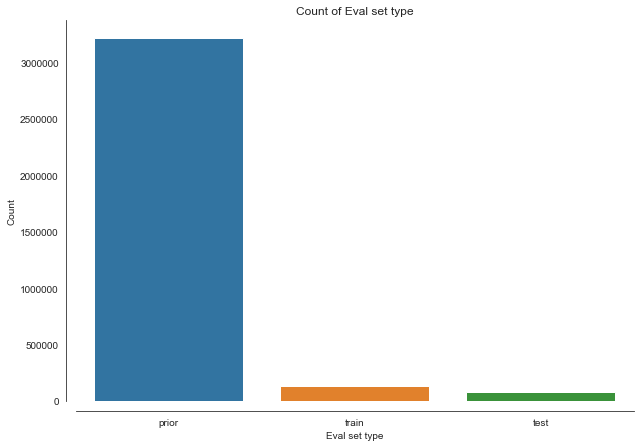

In [27]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'eval_set', data = df_orders)
plt.xlabel ('Eval set type')
plt.ylabel ('Count')
plt.title ('Count of Eval set type')
sns.despine(offset=10)
plt.show()

'Eval set' type - dataset is categorized into prior, train and test. 

### Single orders and reorders

In [28]:
ord_reord_pie = df_order_products_prior[['product_id','reordered']].copy()
ord_reord_pie = ord_reord_pie.groupby(['reordered'])['product_id'].count().reset_index()
ord_reord_pie.rename(columns={"product_id": "count"}, inplace = True)
ord_reord_pie.replace([0,1], ['No-reorder','Reordered'], inplace = True)

In [29]:
ord_reord_pie

,reordered,count
0,No-reorder,13307953
1,Reordered,19126536


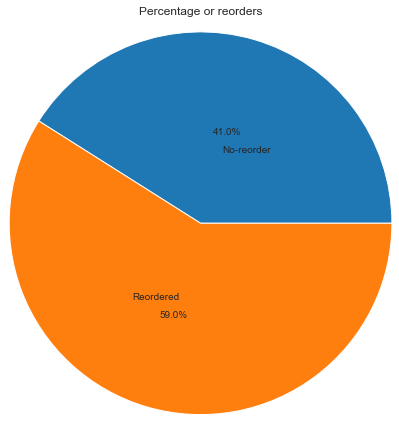

In [30]:
plt.pie('count', labels='reordered',autopct= '%1.1f%%', pctdistance=0.5,\
        labeldistance=0.4, radius=2.2, data=ord_reord_pie)
plt.title('Percentage or reorders', loc = 'center', pad = 100)
plt.show()

**59% of all the products in the dataset are reordered**

### Orders by day of the week

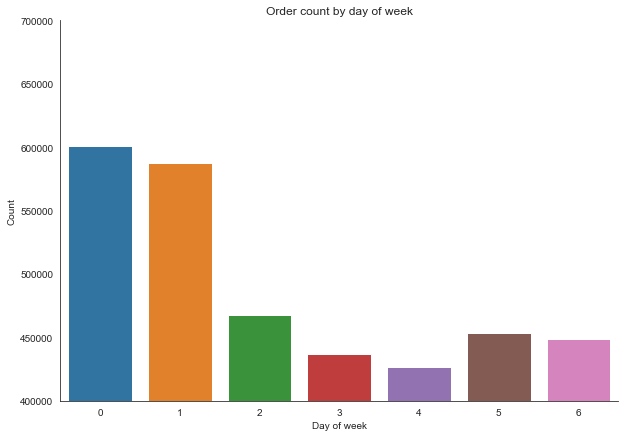

In [31]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'order_dow', data = df_orders)
plt.xlabel ('Day of week')
plt.ylabel ('Count')
plt.ylim(400000,700000)
plt.title ('Order count by day of week')
sns.despine()#offset=10)
plt.show()

There is no description of day of week and associated numerals - it is assumed that 0 corresponds to Saturday and
1 corresponds to Sunday (intuitively, most orders are placed on these two days)

Above plot shows that most orders (600000 orders on Saturday and about 575000 orders on Sunday) are on the weekends
in comparison with weekday orders 

### Orders by the hour of the day

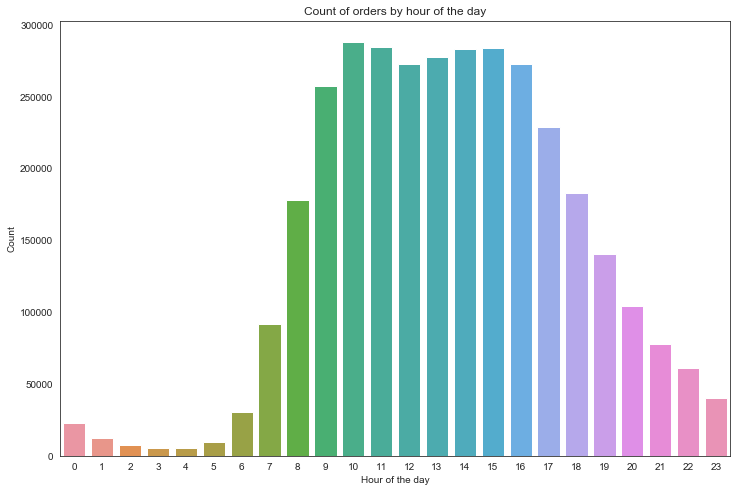

In [32]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'order_hour_of_day', data = df_orders)
plt.xlabel ('Hour of the day')
plt.ylabel ('Count')
plt.title ('Count of orders by hour of the day')
plt.show()

It is evident from the bar graph above that most orders are placed between 8 am and 8 pm.<br/>
The least number of orders are placed between midnight and 6 am.

### Reordering frequency 

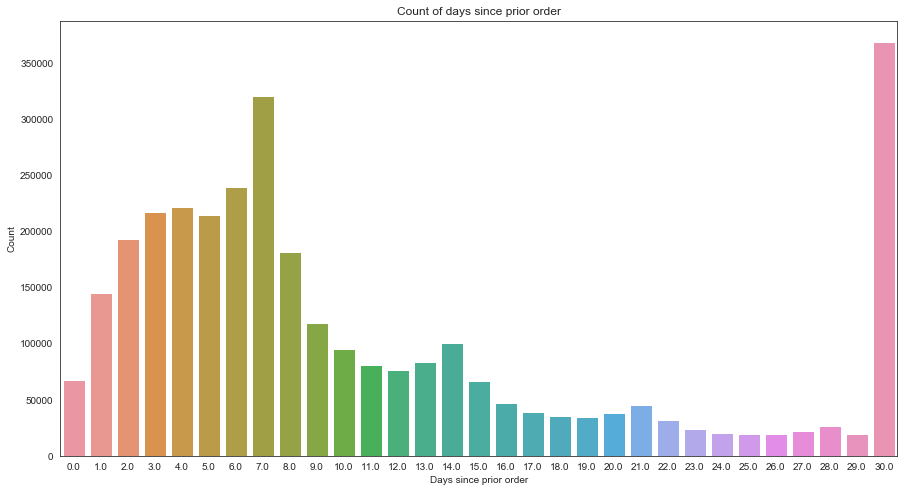

In [33]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'days_since_prior_order', data = df_orders)
plt.xlabel ('Days since prior order')
plt.ylabel ('Count')
plt.title ('Count of days since prior order')
plt.show()

- Above graph shows interesting trends - although there are several orders within 4-7 days since the last order,
a significant number of orders are placed after 30 days of previous order. 

- This trend is interesting as the number of next orders decrease after the 7 day period until the 30th day.<br/>

- Also, above spikes in reorder on specific days could possibly because of a subscription service (reordering an item at user defined
frequency) - although such details are not available in the dataset.




In [34]:
df_orders['user_id'].value_counts()

53684     100
201623    100
50817     100
176951    100
88911     100
131634    100
1958      100
100982    100
159352    100
45938     100
109170    100
111739    100
58853     100
87406     100
190416    100
20126     100
40278     100
143177    100
68716     100
178993    100
78929     100
110447    100
104339    100
134199    100
150313    100
68610     100
186835    100
62239     100
11588     100
183129    100
         ... 
166755      4
49964       4
135330      4
204932      4
39718       4
165626      4
26542       4
205649      4
167675      4
23358       4
821         4
175871      4
54063       4
83587       4
58153       4
110825      4
93830       4
25400       4
76560       4
123657      4
109312      4
118418      4
106136      4
195435      4
80120       4
24224       4
199509      4
32420       4
21310       4
196830      4
Name: user_id, Length: 206209, dtype: int64

In [35]:
df_orders['days_since_prior_order'].value_counts()

30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

In [36]:
df_orders.loc[df_orders['days_since_prior_order'] == 0].count()

order_id                  67755
user_id                   67755
eval_set                  67755
order_number              67755
order_dow                 67755
order_hour_of_day         67755
days_since_prior_order    67755
dtype: int64

In [37]:
df_orders.loc[df_orders['days_since_prior_order'].isna()].count()

order_id                  206209
user_id                   206209
eval_set                  206209
order_number              206209
order_dow                 206209
order_hour_of_day         206209
days_since_prior_order         0
dtype: int64

Number of orders for which there were no prior orders = 67755
To decide whether to drop these rows from original dataframe

### Number of reorders by user id

In [38]:
uid_orders = df_orders.groupby(['order_number'])['user_id'].count().reset_index()
uid_orders_sorted = uid_orders.sort_values(by = 'order_number',ascending = False).reset_index()

# uid_orders.drop('index', axis =1, inplace = True)
uid_orders_sorted.head(10)



,index,order_number,user_id
0,99,100,1374
1,98,99,1421
2,97,98,1471
3,96,97,1525
4,95,96,1592
5,94,95,1656
6,93,94,1713
7,92,93,1780
8,91,92,1849
9,90,91,1905


In [39]:
df_order_products_prior['order_id'].count()

32434489

In [40]:
df_order_products_prior['product_id'].count()

32434489

In [41]:
df_products['product_id'].count()

49688

In [42]:
df_dept['department_id'].count()

21

### Merging tables

The following dataframes are merged on left join with df_order_products_prior

- df_order_products_prior<br/>
- df_products<br/>
- df_aisles<br/>
- df_departments

In [43]:
df_order_products_merged = pd.merge(df_order_products_prior, df_products, how = 'left', on = 'product_id')
df_order_products_merged = pd.merge(df_order_products_merged, df_aisles, how = 'left', on = 'aisle_id')
df_order_products_merged = pd.merge(df_order_products_merged, df_dept, how = 'left', on = 'department_id')

df_order_products_merged.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [44]:
df_order_products_merged.isna().sum().sum()

0

### Reordered products - analysis

**By filtering the reordered products from the dataset, we will analyse the products that were reordered**

In [45]:
df_reordered = df_order_products_merged.loc[df_order_products_merged['reordered'] == 1]
df_reordered.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry


(0.0, 6468745.5, -0.5, 20.5)

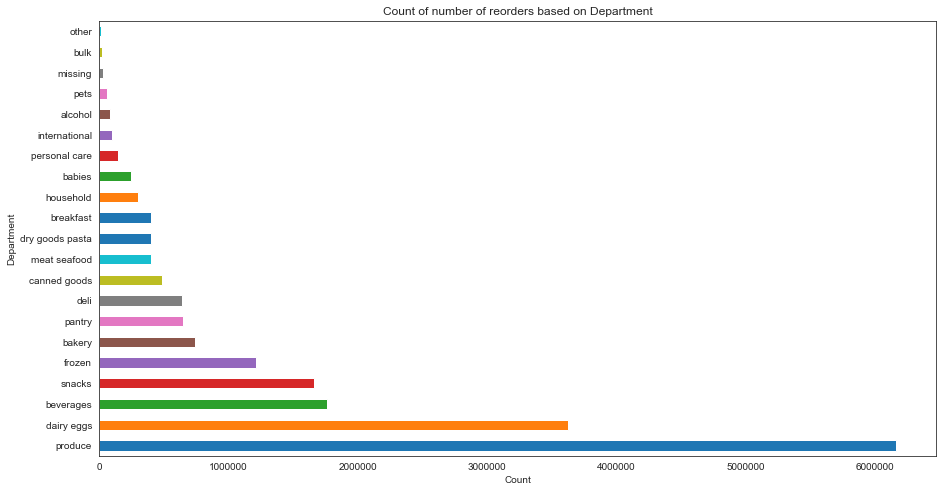

In [46]:
ax1 = df_reordered['department'].value_counts().plot(kind='barh',
                                    figsize=(15,8),
                                    title="Count of number of reorders based on Department")
ax1.set_xlabel("Count")
ax1.set_ylabel("Department")
plt.axis('on')

Most reorders are from the produce department, followed by dairy eggs and beverages.<br/>
Let us inspect the products which were reordered the most

### Top reordered products

In [47]:
reord_products = df_reordered['product_name'].value_counts().reset_index()
reord_products.columns = ['product_name', 'count']
top_reord_products = reord_products.head(15)
top_reord_products

,product_name,count
0,Banana,398609
1,Bag of Organic Bananas,315913
2,Organic Strawberries,205845
3,Organic Baby Spinach,186884
4,Organic Hass Avocado,170131
5,Organic Avocado,134044
6,Organic Whole Milk,114510
7,Large Lemon,106255
8,Organic Raspberries,105409
9,Strawberries,99802


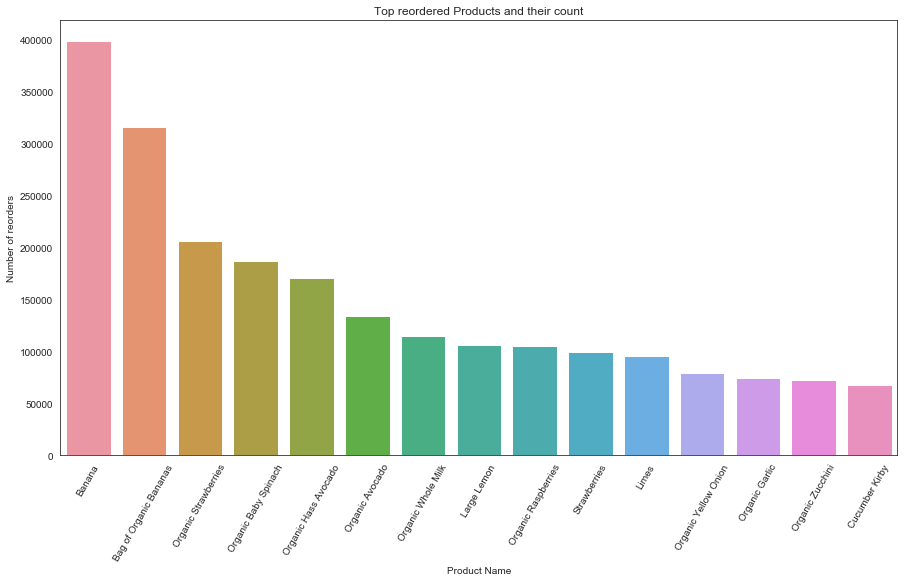

In [48]:
plt.figure(figsize = (15,8))
sns.barplot(top_reord_products['product_name'],top_reord_products['count'] )
plt.xlabel('Product Name')
plt.xticks(rotation = 60)
plt.ylabel('Number of reorders')
plt.title ('Top reordered Products and their count')
plt.show()

### Reordering by aisle name

In [49]:
df_reordered_aisle = df_reordered['aisle'].value_counts().reset_index()
df_reordered_aisle.columns =  ['Aisle name', 'count']
df_reordered_aisle_top = df_reordered_aisle.head(15)
df_reordered_aisle_top

,Aisle name,count
0,fresh fruits,2615469
1,fresh vegetables,2032172
2,packaged vegetables fruits,1127177
3,yogurt,997018
4,milk,696264
5,water seltzer sparkling water,613977
6,packaged cheese,573383
7,soy lactosefree,442023
8,chips pretzels,425387
9,bread,391937


Above table shows the list of top items in a reorder, most orders being fruits or vegetables

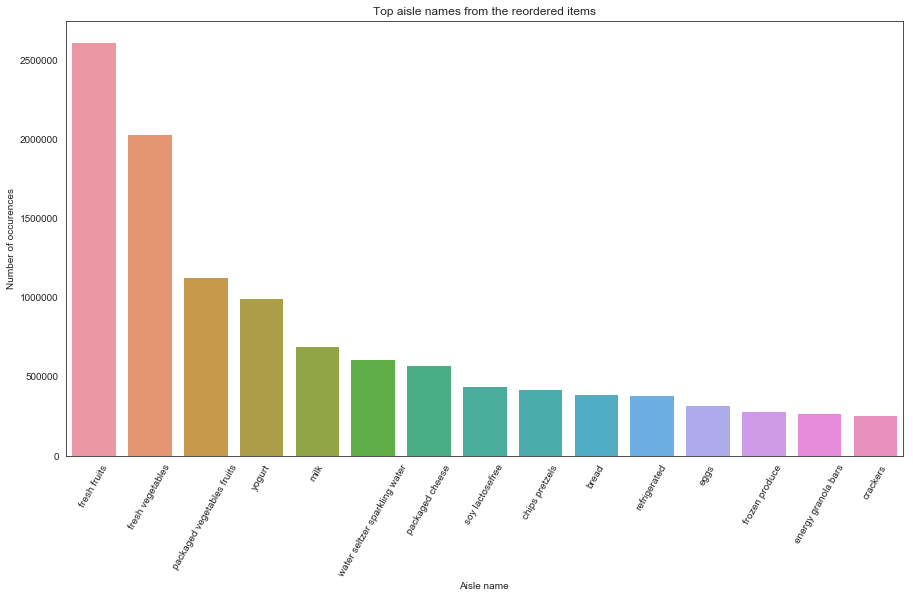

In [50]:
plt.figure(figsize = (15,8))
sns.barplot(df_reordered_aisle_top['Aisle name'],df_reordered_aisle_top['count'] )
plt.xlabel('Aisle name')
plt.xticks(rotation = 60)
plt.ylabel('Number of occurences')
plt.title ('Top aisle names from the reordered items')
plt.show()

### Number of products in the reorders

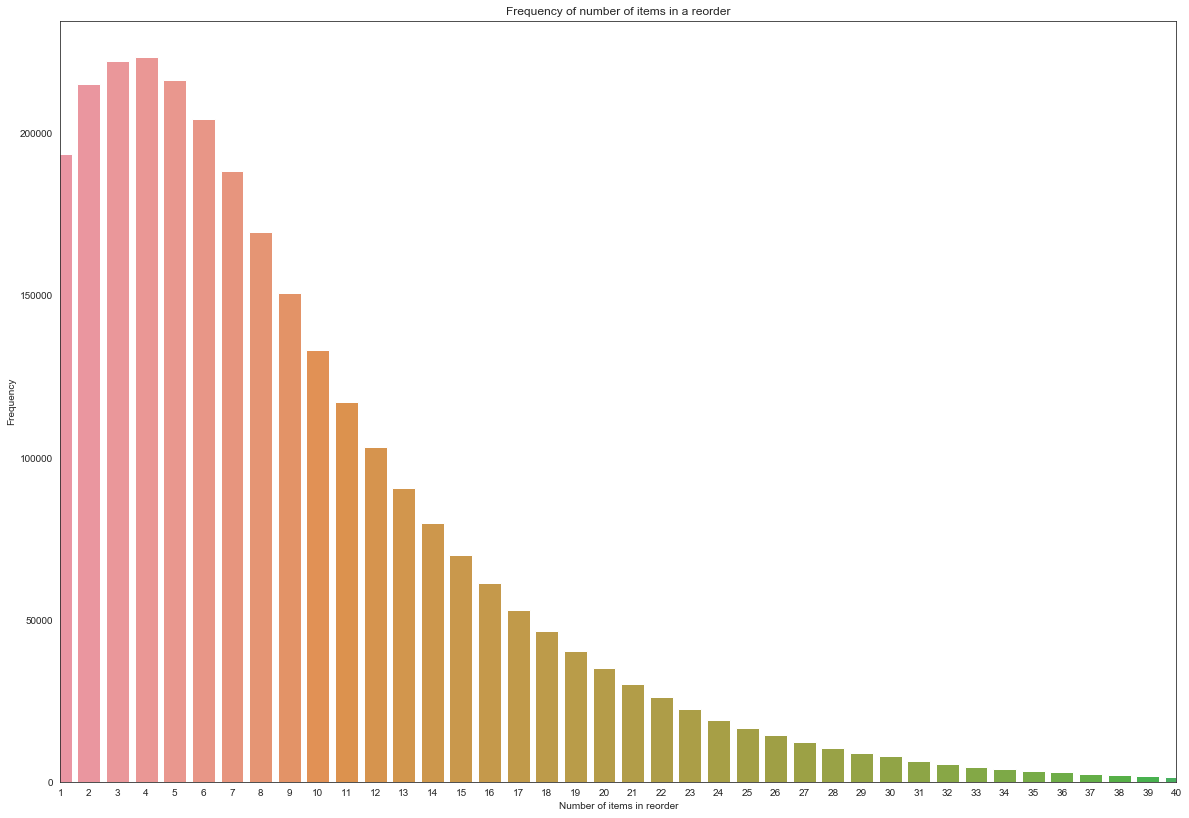

In [51]:
df_reordered_noofitems = df_reordered.groupby(['order_id'])['add_to_cart_order'].max().reset_index()
grouped = df_reordered_noofitems['add_to_cart_order'].value_counts()

plt.figure(figsize = (20,14))
sns.barplot (grouped.index, grouped.values)
plt.xlabel('Number of items in reorder')
plt.ylabel ('Frequency')
plt.xlim((0,39))
plt.title('Frequency of number of items in a reorder')
plt.show()

From the above bar graph, most reorders have between 1 and 8 products.<br/>
Maximum number of reorders were with 4 products in the order.<br/> 
*Note : The number of items were limited to 40 for better visualization of graph*

### Organic products in reorders

In [52]:
df_reordered.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry


In [53]:
df_organic_reord = df_reordered[df_reordered['product_name'].str.contains("Organic")]
df_organic_reord.shape

(6508236, 9)

In [54]:
df_organic_reord = df_organic_reord['product_name'].value_counts().reset_index()
df_organic_reord.columns = ['product name', 'count']
df_organic_reord_top  = df_organic_reord.head(15)
df_organic_reord_top

,product name,count
0,Bag of Organic Bananas,315913
1,Organic Strawberries,205845
2,Organic Baby Spinach,186884
3,Organic Hass Avocado,170131
4,Organic Avocado,134044
5,Organic Whole Milk,114510
6,Organic Raspberries,105409
7,Organic Yellow Onion,79072
8,Organic Garlic,74663
9,Organic Zucchini,72165


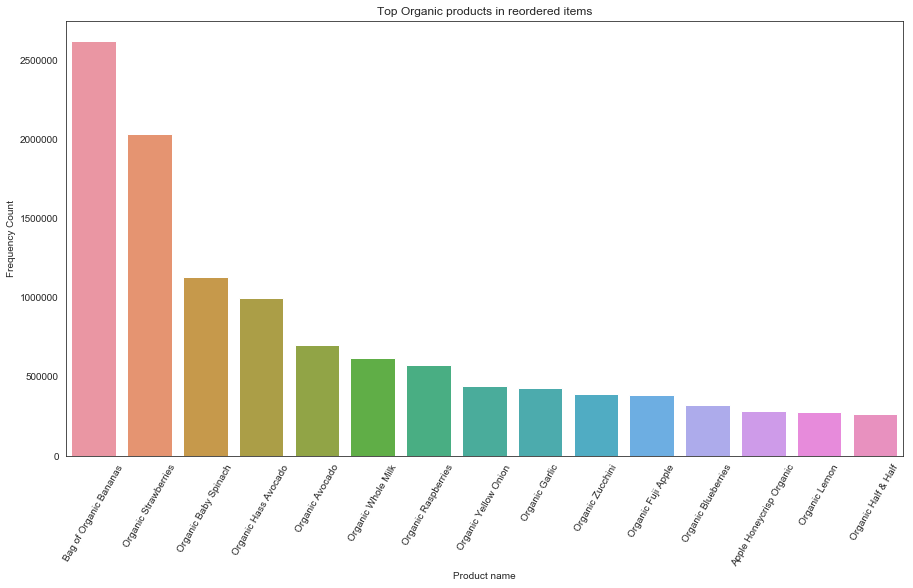

In [55]:
plt.figure(figsize = (15,8))
sns.barplot(df_organic_reord_top['product name'],df_reordered_aisle_top['count'] )
plt.xlabel('Product name')
plt.xticks(rotation = 60)
plt.ylabel('Frequency Count')
plt.title ('Top Organic products in reordered items')
plt.show()


**Bananas, strawberries, spinach, Avocado top the list of top organic items in a reorder.**

### Reorder Ratio by department

In [56]:
reorder_ratio_dept = df_order_products_merged.groupby('department')['reordered'].mean().reset_index()
reorder_ratio_dept.columns = ['department', 'reorder_ratio']
reorder_ratio_dept.sort_values(by='reorder_ratio', ascending=False)

,department,reorder_ratio
7,dairy eggs,0.669969
3,beverages,0.653460
19,produce,0.649913
2,bakery,0.628141
8,deli,0.607719
18,pets,0.601285
1,babies,0.578971
5,bulk,0.577040
20,snacks,0.574180
0,alcohol,0.569924


### Reorder Ratio by Aisle

In [57]:
reorder_ratio_aisle = df_order_products_merged.groupby('aisle')['reordered'].mean().reset_index()
reorder_ratio_aisle.columns = ['aisle', 'reorder_ratio']
reorder_ratio_aisle.sort_values(by='reorder_ratio', ascending=False)

,aisle,reorder_ratio
83,milk,0.781428
131,water seltzer sparkling water,0.729593
50,fresh fruits,0.718104
41,eggs,0.705366
119,soy lactosefree,0.692551
96,packaged produce,0.690734
133,yogurt,0.686489
33,cream,0.685046
11,bread,0.670168
110,refrigerated,0.663302


### Frequency(of ordering) of top reordered products
 

In [58]:
df_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [59]:
df_orders.shape

(3421083, 7)

In [60]:
df_reordered.shape

(19126536, 9)

In [61]:
df_order_products_merged.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce


In [62]:
df_orders.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [63]:
order_merged = pd.merge (df_order_products_merged, df_orders, how = 'inner', on = 'order_id')
order_merged.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0


### Frequency (of ordering) of top reordered departments/aisles

### Number of reorders per customer 

In [64]:
df_reordered_orderid = df_reordered.groupby(['add_to_cart_order'])['order_id'].count().reset_index()